<a href="https://colab.research.google.com/github/ghm8614/Python/blob/main/%EC%BD%94%EB%A1%9C%EB%82%98%EC%99%80_%EC%A3%BC%EC%8B%9D%5B%EA%B8%B0%EB%A7%90_%ED%8C%80%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 팀원명단(학과,학번,이름), 주제
코로나 확진자 수와 주가 간 상관관계를 보여 주는 프로그램입니다.

중어중문학과 천수병  
경제학부 정지원  
철학과 박성우  
언어학과 황세원  
정치외교학부 김시연  

## 한글글꼴/csv파일 설치

### 한글글꼴 설정

In [ ]:
!apt-get install fonts-nanum*

In [ ]:
import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()
sys_font 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl 
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False 

### 파일 업로드

In [ ]:
# 파일 업로드하기 
from google.colab import files  
myfile = files.upload() 

##전체 코드

코로나 확진자 수와 주가 간 상관관계를 보여 주는 프로그램입니다.

===================================Menu===================================
1. 의료 (씨젠)  2. IT (스튜디오 드래곤)  3. 여행사 (하나투어)
보고 싶은 데이터를 선택하세요. : 3
===================================Date===================================
보고 싶은 기간을 입력해주세요.
시작 날짜
월(MM)(예: 02) 01
일(DD)(예: 01) 22
끝 날짜
월(MM)(예: 02) 12
일(DD)(예: 01) 30
              종가     전일비  등락률(%)      시가      고가      저가      거래량
20/01/22  51,200    ▼800   -1.54  51,500  51,600  50,600  209,117
20/01/23  49,100  ▼2,100   -4.10  50,700  50,800  49,000  302,391
20/01/28  44,100  ▼5,000  -10.18  44,200  45,650  43,450  672,707
20/01/29  46,150  ▲2,050    4.65  44,600  46,250  44,300  290,152
20/01/30  44,950  ▼1,200   -2.60  46,150  46,700  44,650  180,252
...          ...     ...     ...     ...     ...     ...      ...
20/12/23  50,800  ▼1,700   -3.24  52,500  52,700  50,800  267,749
20/12/24  53,000  ▲2,200    4.33  51,200  53,400  51,200  198,077
20/12/28  52,300    ▼700   -1.32  52,400  53,400  51,700  1

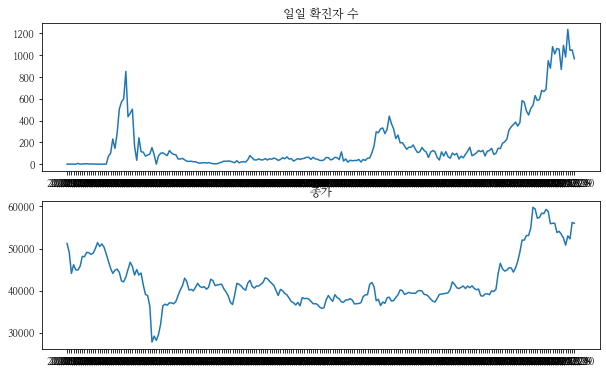

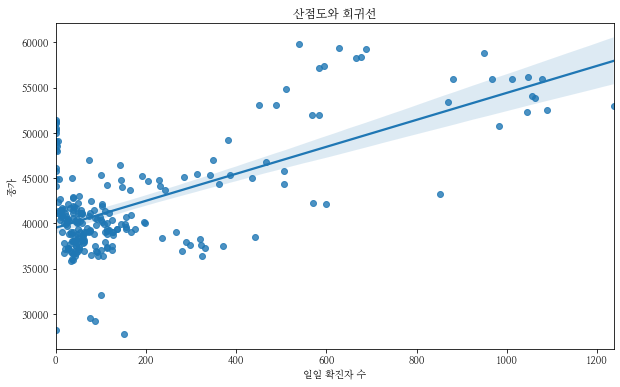

해당 기업의 종가와 코로나 일일 확진자 수 사이에는 강한 양의 상관관계가 있습니다.
다시 하시겠습니까? (예/아니오) : 아니오

프로그램을 종료합니다.


In [ ]:
# 전체 코드
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
print('코로나 확진자 수와 주가 간 상관관계를 보여 주는 프로그램입니다.')
print()

while True:
  print('===================================Menu===================================')
  print('1. 의료 (씨젠)  2. IT (스튜디오 드래곤)  3. 여행사 (하나투어)')
  while True:
    menu = input('보고 싶은 데이터를 선택하세요. : ')
    print('===========================================================================')
    if menu == '1':
      code = '096530' 
      break
    elif menu == '2': 
      code = '253450'
      break
    elif menu == '3' : 
      code = '039130'
      break
    else: 
      print('지원되지 않는 서비스입니다. 다시 선택해 주세요.') 
  print('===================================Date===================================')
  print('보고 싶은 기간을 입력해주세요.')
  print('시작 날짜')
  m1=input('월(MM)(예: 02) ')
  d1=input('일(DD)(예: 01) ')
  print('끝 날짜')
  m2=input('월(MM)(예: 02) ')
  d2=input('일(DD)(예: 01) ')

  final_result=[]
  final_day=[]
  for n in ['1','2','3','4','5','6','7']:
      url = 'https://vip.mk.co.kr/newSt/price/daily.php?p_page='+n+'&y1=2020&m1='+m1+'&d1='+d1+'&y2=2020&m2='+m2+'&d2='+d2+'&stCode='+code
      page = urlopen(url)
      soup = BeautifulSoup(page, 'html.parser')
      abc=soup.td.find_all('table','table_3')
      date=soup.find_all('td','center')
      day=[]
      for i in date:
        day.append(i.string)
      
      efg=abc[0].get_text()
      efg=efg.replace('\n',' ')
      hij=efg.split()
      for i in hij:
        if i == '▼' or i == '▲' or i == '↑':
          a=hij.index(i)
          new=hij[a]+hij[a+1]
          del hij[a]
          del hij[a]
          hij.insert(a,new)
 
      num=len(hij)
      n=8
      result = [hij[i*n:(i+1)*n] for i in range((len(hij) - 1 + n) // n )]
      title=result[0] 
      del result[0]
      final_result.extend(result)
      final_day.extend(day)
 
  d1 = pd.DataFrame(final_result,index=final_day,columns=title)
  d1 = d1.drop('날짜',axis=1)
  d1 = d1.sort_index(ascending=True)
  print(d1)
 
  print('===========================================================================')
  print('1. 종가  2. 등락률(%)  3. 시가  4. 고가 5. 저가 6. 거래량')
  while True:
    what = input('보고 싶은 수치를 선택하세요. : ')
    print('===========================================================================')
    whats = ['종가', '등락률(%)', '시가', '고가', '저가', '거래량']
    if what in ['1', '2', '3', '4', '5', '6']:
      stock = whats[int(what)-1]
      break
    else:
      print('지원하지 않는 수치입니다. 다시 선택해 주세요.')
 
  d2 = d1[stock]
  d2 = d2.str.replace(',','')
  d2 = d2.astype(float)
  d2

  a=final_day[-1].split('/')
  first='20'+a[0]+'-'+a[1]+'-'+a[2]
  b=final_day[0].split('/')
  last='20'+b[0]+'-'+b[1]+'-'+b[2]

  data = pd.read_csv('/content/new_daily_decideCnt2.csv',  encoding='euc-kr') # csv파일 읽고 index 이름 정함 
  data.set_index('date', inplace = True)
  d = pd.DataFrame(data, columns = ['new_cases']) # 1열 데이터프레임 생성 
  d5 = d.rename(columns = {'new_cases' : '일일 확진자 수'})
  d5 = d5.loc[first:last]
 
  d5.index = d2.index
  d3 = pd.concat([d5,d2], axis=1)
  d3
 
  fig = plt.figure(figsize = (10, 6))
  sub1 = fig.add_subplot(2,1,1)
  sub2 = fig.add_subplot(2,1,2)
  sub1.plot(d3.index, d3['일일 확진자 수'])
  sub2.plot(d3.index, d3[stock])
  sub1.set_title('일일 확진자 수')
  sub2.set_title(stock)
  plt.show()
 
  plt.figure(figsize = (10, 6))
  sns.regplot(x = '일일 확진자 수', y = stock, data = d3)
  plt.title('산점도와 회귀선')
  plt.show()
 
  d4 = d3.corr(method = 'pearson')
  d4
  r = d4.iloc[1, 0]
 
  if r < -0.5:
    print('해당 기업의', stock+'와 코로나 일일 확진자 수 사이에는 강한 음의 상관관계가 있습니다.')
  elif r < -0.2:
    print('해당 기업의', stock+'와 코로나 일일 확진자 수 사이에는 약한 음의 상관관계가 있습니다.')
  elif r < 0.2:
    print('해당 기업의', stock+'와 코로나 일일 확진자 수 사이에는 상관관계가 거의 없습니다.')
  elif r < 0.5:
    print('해당 기업의', stock+'와 코로나 일일 확진자 수 사이에는 약한 양의 상관관계가 있습니다.')
  else:
    print('해당 기업의', stock+'와 코로나 일일 확진자 수 사이에는 강한 양의 상관관계가 있습니다.')
 
  againcheck = input('다시 하시겠습니까? (예/아니오) : ')
  if againcheck == '아니오':
    print()
    print('프로그램을 종료합니다.')
    break

### 부분 코드 1 : 주식 데이터 수집 
설명과 구현방법

In [ ]:
  final_result=[] #데이터프레임을 만들기 위한 빈 리스트
  final_day=[] #데이터프레임 인덱스를 만들기 위한 빈 리스트 
  for n in ['1','2','3','4','5','6','7']함 #for 문으로 서로 다른 페이지에 있는 정보들을 모두 추출할 수 있게 함
      url = 'https://vip.mk.co.kr/newSt/price/daily.php?p_page='+n+'&y1=2020&m1='+m1+'&d1='+d1+'&y2=2020&m2='+m2+'&d2='+d2+'&stCode='+cod트
      #입력받은 주식코드와 날짜를 url에 적용하였음
      page = urlopen(url)
      soup = BeautifulSoup(page, 'html.parser')#BeautifulSoup으로 웹페이지를 추출함
      abc=soup.td.find_all('table','table_3')#td 태그에서의 table 태그 부분을 추출하여 주식관련 정보를 추출
      date=soup.find_all('td','center')#td태그에서 클래스가 center인 부분을 추출하여 날짜 정보를 추출
      day=[]
      for i in date:
        day.append(i.string) #for 문을 활용하여 day에 날짜를 아이템으로 추가한 리스트를 만듦 
      
      efg=abc[0].get_text() #추출한 태그 안의 text를 반환
      efg=efg.replace('\n',' ') #줄바꿈한 부분을 공백으로 바꿈
      hij=efg.split()#정보들을 공백에 따라 분리하여 리스트로 만듦
      for i in hij:
        if i == '▼' or i == '▲' or i == '↑':
          a=hij.index(i)
          new=hij[a]+hij[a+1]
          del hij[a]
          del hij[a]
          hij.insert(a,new) #전일비 항목의 '▼','▲'기호와 숫자가 분리되어 있어 리스트 안의 두 아이템을 합침
 
      num=len(hij)
      n=8
      result = [hij[i*n:(i+1)*n] for i in range((len(hij) - 1 + n) // n )] # 리스트를 아이템 8개씩으로 분리하여 항목별 정보를 얻을 수 있게 함
      title=result[0] 
      del result[0]
      final_result.extend(result) #for문으로 얻은 기업정보들을 하나의 리스트에 모음
      final_day.extend(day) #for문으로 얻은 날짜를 하나의 리스트에 모음
 
  d1 = pd.DataFrame(final_result,index=final_day,columns=title) #데이터 프레임 생성
  d1 = d1.drop('날짜',axis=1)
  d1 = d1.sort_index(ascending=True)
  print(d1)

### 부분 코드 2: 코로나 일일 확진자 수 수집  
설명과 구현방법

In [ ]:
# 설명 : (아래 코맨트를 참고해 주시기 바랍니다.)
# 구현방법 = 컴퓨팅 기초 14강 참고하여 코드를 작성했습니다. DataFrame 생성,.rename() 함수, if else문 등을 사용했습니다. 
# 소스 링크 = 'https://ourworldindata.org/coronavirus/country/south-korea?country=~KOR' 에서 csv파일을 다운받았습니다.
from google.colab import files 
myfile = files.upload() # 파일 업로드하기

import pandas as pd # pandas 모듈 임포트하기

data = pd.read_csv('/content/new_daily_decideCnt2.csv',  encoding='euc-kr') # csv파일 읽고
data.set_index('date', inplace = True) #index 값 정함
d = pd.DataFrame(data, columns = ['new_cases']) # 1열 데이터프레임 생성 
d5 = d.rename(columns = {'new_cases' : '일일 확진자 수'}) # 1열 제목 바꿈

### 부분 코드 3: 데이터 시각화
설명과 구현방법

In [ ]:
print('===========================================================================')
print('1. 종가  2. 등락률(%)  3. 시가  4. 고가 5. 저가 6. 거래량')
while True:
  what = input('보고 싶은 수치를 선택하세요. : ')
  print('===========================================================================')
  whats = ['종가', '등락률(%)', '시가', '고가', '저가', '거래량']
  if what in ['1', '2', '3', '4', '5', '6']:
    stock = whats[int(what)-1]
    break
  else:
    print('지원하지 않는 수치입니다. 다시 선택해 주세요.')


d2 = d1[stock]
d2 = d2.str.replace(',','')
d2 = d2.astype(float) # astype()함수를 이용해서 float로 데이터 타입 변경
d2
 
import pandas as pd
d1.index = d2.index
d3 = pd.concat([d1,d2], axis=1) # concat()함수로 두 데이터 프레임의 column결합
d3

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (10, 6)) # figure()함수로 fig객체 생성
sub1 = fig.add_subplot(2,1,1) # 객체.add_subplot()으로 복수의 그래프를 그림
sub2 = fig.add_subplot(2,1,2)
sub1.plot(d3.index, d3['일일 확진자 수'])
sub2.plot(d3.index, d3[stock])
sub1.set_title('일일 확진자 수')
sub2.set_title(stock)
plt.show()

plt.figure(figsize = (10, 6))
sns.regplot(x = '일일 확진자 수', y = stock, data = d3)
plt.title('산점도와 회귀선')
plt.show()

d4 = d3.corr(method = 'pearson')  # 상관관계 분석
r = d4.iloc[1, 0]  #r은 상관계수

if r < -0.5:
  print('해당 기업의', stock+'와 코로나 일일 확진자 수 사이에는 강한 음의 상관관계가 있습니다.')
elif r < -0.2:
  print('해당 기업의', stock+'와 코로나 일일 확진자 수 사이에는 약한 음의 상관관계가 있습니다.')
elif r < 0.2:
  print('해당 기업의', stock+'와 코로나 일일 확진자 수 사이에는 상관관계가 거의 없습니다.')
elif r < 0.5:
  print('해당 기업의', stock+'와 코로나 일일 확진자 수 사이에는 약한 양의 상관관계가 있습니다.')
else:
  print('해당 기업의', stock+'와 코로나 일일 확진자 수 사이에는 강한 양의 상관관계가 있습니다.')